In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Background

Bangkok, one of the world’s most visited cities, has experienced significant growth in short-term rentals through platforms like Airbnb. With its mix of vibrant neighborhoods, diverse accommodations, and a competitive rental market, understanding key factors influencing pricing, host performance, and guest behavior is crucial. This analysis focuses on Bangkok Airbnb listings to provide actionable insights for hosts, property managers, and stakeholders. The analysis addresses five key business questions:

1. Pricing and Room Types:
	- What is the average price per night for different room types in various neighborhoods?
2. Host Characteristics:
	- What common characteristics do hosts with the highest number of reviews share?
3. Neighborhood Availability and Pricing:
	- Which neighborhoods have the highest and lowest availability rates, and how does this impact pricing?
4. Review Trends:
	- Is there a trend in the types of listings that are more frequently reviewed?
5. Minimum Nights and Pricing
	- For listings with a high number of reviews, what is the average minimum nights, and how does it correlate with price?



### First is to import the dataset from .csv file into Python. Then, remove any duplicate listing id.

In [2]:
#import dataset
main_dataset = pd.read_csv('./Airbnb Listings Bangkok.csv')

#Describe dataset
main_dataset.describe()


#Drop duplicate ids
main_dataset.drop_duplicates(subset=['id'], inplace = True)

main_dataset



,No,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,1/6/20,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,4/1/22,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092000,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243000,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864000,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717000,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## 1. What is the average price per night for different room types in various neighborhoods?

<Axes: ylabel='price'>

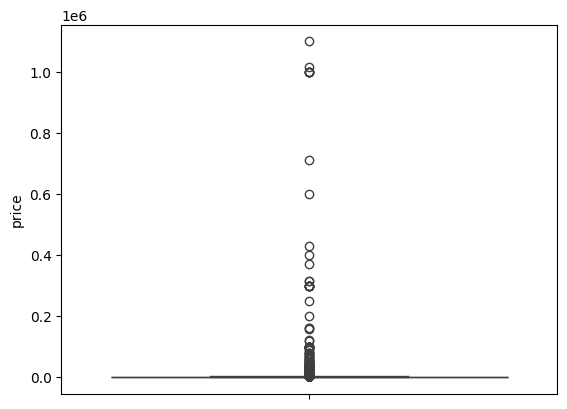

In [3]:
#Check for outliers in price

sns.boxplot(main_dataset['price'])

### Looking at the boxplot, the price field has a lot of outliers. To remove these outliers, we first group the data by neighbourhoods and then by room types. Then, we can start the data cleaning by removing the outliers using interquartile range.

<Axes: ylabel='price'>

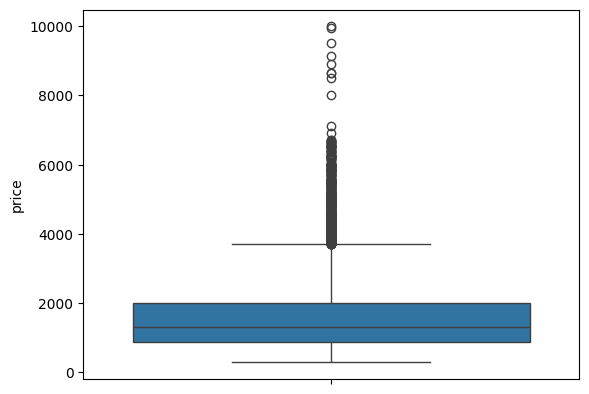

In [6]:
#Remove outliers with grouping data by neighbourhood and price


#Group data by neighbourhood
grouped_data_neighbourhood = main_dataset.groupby(['neighbourhood'])


def detect_outliers_neighbourhood(group) :
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

  

    neighbourhood_limits = pd.Series({
        'neighbourhood': group.name,
        'lower_limit': lower_limit,
        'upper_limit': upper_limit
    })


    outliers = group[(group['price'] < lower_limit) | (group['price'] > upper_limit)]
    return outliers


outliers_by_neighbourhood = grouped_data_neighbourhood.apply(detect_outliers_neighbourhood).reset_index(drop=True)



#Remove outliers in grouped data
def remove_outliers_neighbourhood(group) :
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    return group[(group['price'] >= lower_limit) & (group['price'] <= upper_limit)]

cleaned_main_dataset = grouped_data_neighbourhood.apply(remove_outliers_neighbourhood).reset_index(drop=True)

# Remove rows where price is 0
cleaned_main_dataset = cleaned_main_dataset[cleaned_main_dataset['price'] > 0]

sns.boxplot(cleaned_main_dataset['price'])




room_type      Entire home/apt
lower_limit             -743.0
upper_limit             3905.0
dtype: object
room_type      Hotel room
lower_limit      -1171.75
upper_limit       4406.25
dtype: object
room_type      Private room
lower_limit          -702.5
upper_limit          3301.5
dtype: object
room_type      Shared room
lower_limit           75.0
upper_limit          915.0
dtype: object


<Axes: ylabel='price'>

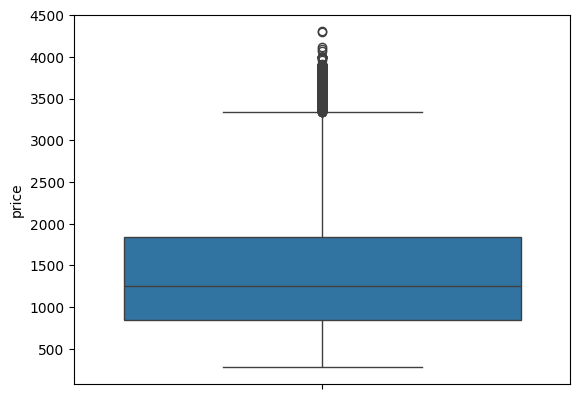

In [7]:
#Group data by room type

grouped_data_roomtype = cleaned_main_dataset.groupby(['room_type'])

def detect_outliers_room_type(group) :
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

  

    room_type_limits = pd.Series({
        'room_type': group.name,
        'lower_limit': lower_limit,
        'upper_limit': upper_limit
    })

    print(room_type_limits)

    outliers = group[(group['price'] < lower_limit) | (group['price'] > upper_limit)]
    return outliers


outliers_by_roomtype = grouped_data_roomtype.apply(detect_outliers_room_type).reset_index(drop=True)

#Remove outliers in grouped data
def remove_outliers_room_type(group) :
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    return group[(group['price'] >= lower_limit) & (group['price'] <= upper_limit)]


cleaned_main_dataset_final = grouped_data_roomtype.apply(remove_outliers_room_type).reset_index(drop=True)

cleaned_main_dataset_final.to_csv(r'cleaned_main_dataset_final.csv')



sns.boxplot(cleaned_main_dataset_final['price'])




### After removing the outliers, we can see that there are less outliers on the boxplot. Next, we need to test a hypothesis to fully confirm the result of the analysis.
### Hypothesis Testing

Null Hypothesis: Average price per night is the same for each room types

Alternative Hypothesis: At least one pair of room types are not equal

Testing Method: Anova F-Test



In [8]:
#Anova F-Test to test hypothesis
for i in cleaned_main_dataset_final['room_type'].unique() :
    print('Mean of Average Price per Night for {} : {}'.format(i, cleaned_main_dataset_final[cleaned_main_dataset_final['room_type']==i]['price'].mean()))


from scipy.stats import f_oneway
f_oneway (
    cleaned_main_dataset_final[cleaned_main_dataset_final['room_type']=='Entire home/apt']['price'],
    cleaned_main_dataset_final[cleaned_main_dataset_final['room_type']=='Hotel room']['price'],
    cleaned_main_dataset_final[cleaned_main_dataset_final['room_type']=='Private room']['price'],
    cleaned_main_dataset_final[cleaned_main_dataset_final['room_type']=='Shared room']['price'],
)


Mean of Average Price per Night for Entire home/apt : 1586.4673066943435
Mean of Average Price per Night for Hotel room : 1627.3698884758364
Mean of Average Price per Night for Private room : 1270.2277587250353
Mean of Average Price per Night for Shared room : 483.7088036117382


F_onewayResult(statistic=434.1027438045311, pvalue=2.2052471504124856e-269)

### Based on the result of the testing, the result of the p-value is extremely low and way below the significance level. This means that there is enough evidence to reject the null hypothesis and support the alternative hypothesis, which is at least one pair of room types are not equal

### We can start visiualizing the data using matplotplib and seaborn.

,room_type,price
0,Entire home/apt,1586.467307
1,Hotel room,1627.369888
2,Private room,1270.227759
3,Shared room,483.708804


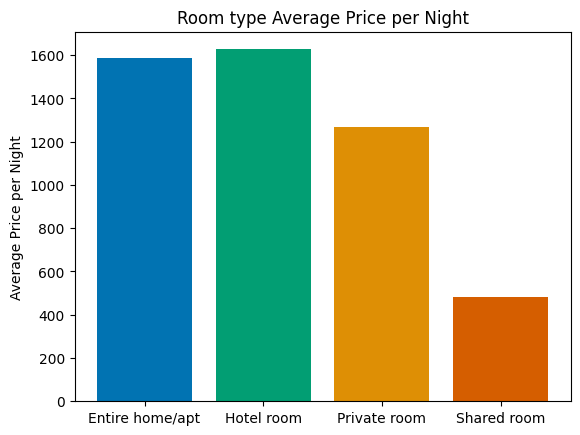

In [9]:
#Create average price for room type bar chart and number of listings per room type pie chart

#Room type colour order and assignment in bar and pie chart
colorblind_palette = sns.color_palette('colorblind', 4)
room_types_order = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']


room_type_avg_price = cleaned_main_dataset_final[['price','room_type']].groupby(['room_type'], as_index=False).mean()


plt.bar(
    room_type_avg_price['room_type'],
    room_type_avg_price['price'], 
    color=[colorblind_palette[room_types_order.index(rt)] for rt in room_type_avg_price['room_type']]
)

plt.ylabel("Average Price per Night")
plt.title("Room type Average Price per Night")

room_type_avg_price




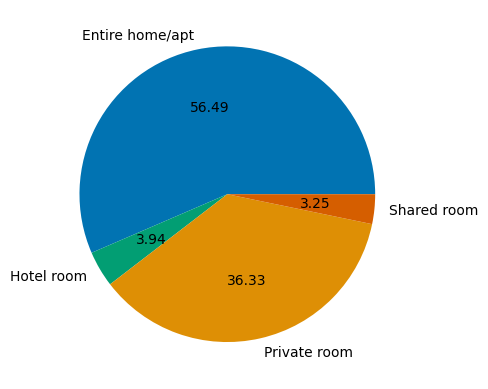

,room_type,id
0,Entire home/apt,7708
1,Hotel room,538
2,Private room,4957
3,Shared room,443


In [10]:
room_type_listings_count = cleaned_main_dataset_final[['id','room_type']].groupby(['room_type'], as_index=False).count()




plt.pie(
    room_type_listings_count['id'],
    labels= room_type_listings_count['room_type'],
    autopct='%.2f',
    colors=[colorblind_palette[room_types_order.index(rt)] for rt in room_type_listings_count['room_type']]

)

plt.show()

room_type_listings_count

       neighbourhood        room_type    price
0           Bang Bon  Entire home/apt  1600.00
1           Bang Bon     Private room  1440.67
2          Bang Kapi  Entire home/apt  1004.15
3          Bang Kapi       Hotel room   600.00
4          Bang Kapi     Private room  1095.33
..               ...              ...      ...
160  Wang Thong Lang      Shared room   350.00
161        Yan na wa  Entire home/apt  1829.18
162        Yan na wa       Hotel room  1950.00
163        Yan na wa     Private room  1239.77
164        Yan na wa      Shared room   715.00

[165 rows x 3 columns]


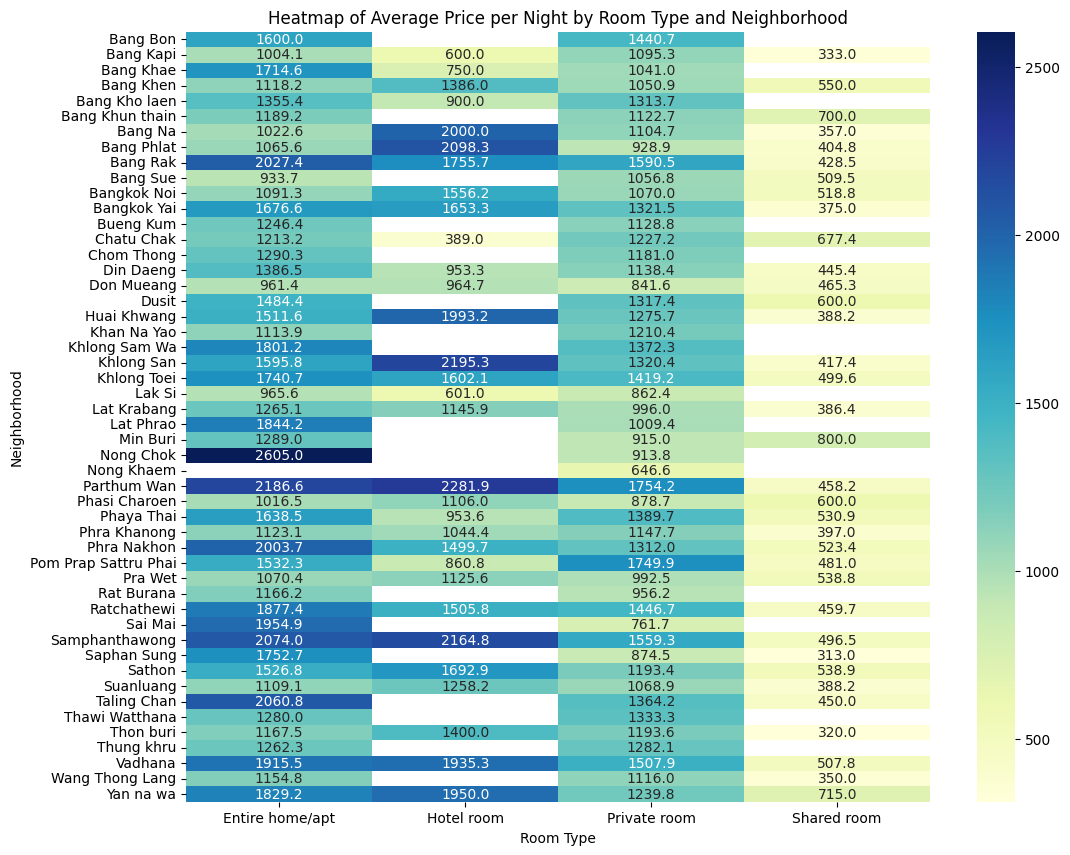

In [11]:
#Average price per room type heatmap
average_price = cleaned_main_dataset_final.groupby(['neighbourhood', 'room_type'])['price'].mean().round(2).reset_index()
print(average_price)



#Pivot the data for heatmap
pivot_table = average_price.pivot(index="neighbourhood", columns="room_type", values="price")

#Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Average Price per Night by Room Type and Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Room Type')
plt.show()




## 2. What common characteristics do hosts with the highest number of reviews share?

In [12]:
#Create a table for top 10 hosts with the highest number of reviews along with their attributes

grouped_data_host = cleaned_main_dataset_final.groupby('host_id').agg(
    host_name=('host_name','first'),
    total_listing = ('calculated_host_listings_count','count'),
    total_reviews = ('number_of_reviews','sum'),
    average_price = ('price','mean'),
    median_availability = ('availability_365','median'),
    median_minimum_nights = ('minimum_nights','median')
).reset_index()


#Sort the table by total number of reviews. Display the top 10 result
grouped_data_host = grouped_data_host.sort_values(by='total_reviews',ascending=False).round(2).head(10)

grouped_data_host



,host_id,host_name,total_listing,total_reviews,average_price,median_availability,median_minimum_nights
98,1927968,Evan,37,6117,928.43,346.0,1.0
1750,47324488,Tony,31,4300,1443.74,146.0,1.0
3997,201677068,Curry,209,4256,1666.21,353.0,1.0
1180,30963587,Themustang,10,3584,2291.80,47.0,1.0
1012,26736483,K,75,2927,1509.05,350.0,1.0
1480,40262107,Patty,39,2813,1354.59,86.0,1.0
2843,105689479,Taosiam,34,2681,706.91,102.0,1.0
497,12464021,Rebecca,21,2485,1865.95,191.0,8.0
698,19266319,Alex,34,2416,1473.24,280.0,28.0
110,2129668,Wimonpak,41,2318,896.41,359.0,100.0


### The resulting table shows the top 10 host with the highest number of reviews. We can see the characteristics of these hosts with this table. The visualization of this table will be displayed separately in Tableau.

## 3. Which neighborhoods have the highest and lowest availability rates, and how does this impact pricing?

Neighborhoods with Highest Availability Rates:
      neighbourhood  availability_365    price
0          Bang Bon             365.0  1504.40
26         Min Buri             363.5  1054.84
40      Saphan Sung             363.0  1224.83
38          Sai Mai             363.0  1238.97
5   Bang Khun thain             363.0  1113.47
46       Thung khru             362.5  1275.15
25        Lat Phrao             362.0  1309.05
2         Bang Khae             361.0  1314.92
17            Dusit             357.0  1263.70
3         Bang Khen             356.5  1083.01
Neighborhoods with Lowest Availability Rates:
      neighbourhood  availability_365    price
28       Nong Khaem             180.0   646.57
27        Nong Chok             180.0  1590.30
18      Huai Khwang             180.0  1430.79
47          Vadhana             230.0  1782.85
19      Khan Na Yao             233.5  1166.02
44   Thawi Watthana             242.0  1309.09
22      Khlong Toei             249.0  1658.87
48  Wang Thong

<Axes: ylabel='availability_365'>

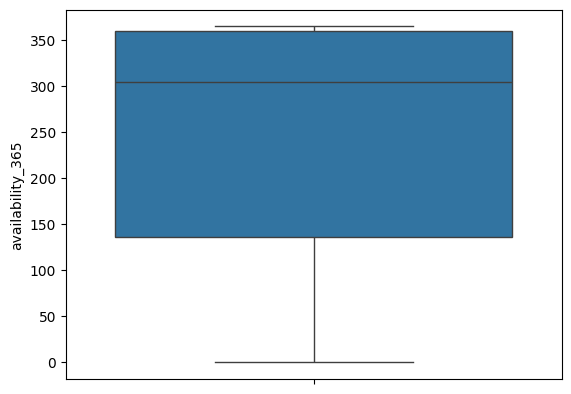

In [ ]:
#Group neighborhoods with their average prices and median availability

grouped_data_neighbourhood_cleaned = cleaned_main_dataset_final.groupby(['neighbourhood'])

grouped_data_neighbourhood_aggregate = grouped_data_neighbourhood_cleaned.agg({
    'availability_365': 'median',
    'price': 'mean'
}).reset_index()


#Sort neighbourhoods with the top 10 highest and lowest availability
highest_availability = grouped_data_neighbourhood_aggregate.sort_values(by='availability_365', ascending=False).head(10).round(2)
lowest_availability = grouped_data_neighbourhood_aggregate.sort_values(by='availability_365').head(10).round(2)

print("Neighborhoods with Highest Availability Rates:")
print(highest_availability)

print("Neighborhoods with Lowest Availability Rates:")
print(lowest_availability)

#Plot boxplot to check distribution of availability
sns.boxplot(cleaned_main_dataset_final['availability_365'])




### The boxplot distribution shows that the distribution of availability is not normal. Therefore, it is correct to use median to measure the availability/

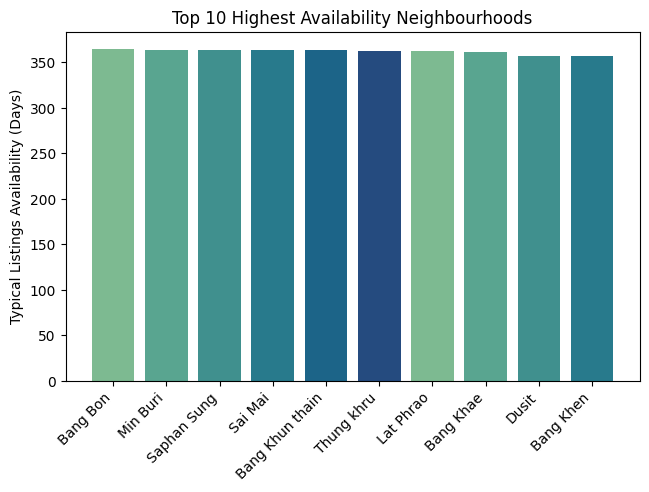

In [14]:
#Plot bar charts for highest availability neighbourhoods
plt.bar(highest_availability['neighbourhood'].tolist(), highest_availability['availability_365'], color=sns.color_palette('crest'))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align to the right
plt.tight_layout()  # Adjust the padding to prevent clipping of labels
plt.ylabel("Typical Listings Availability (Days)")
plt.title("Top 10 Highest Availability Neighbourhoods")
plt.show()


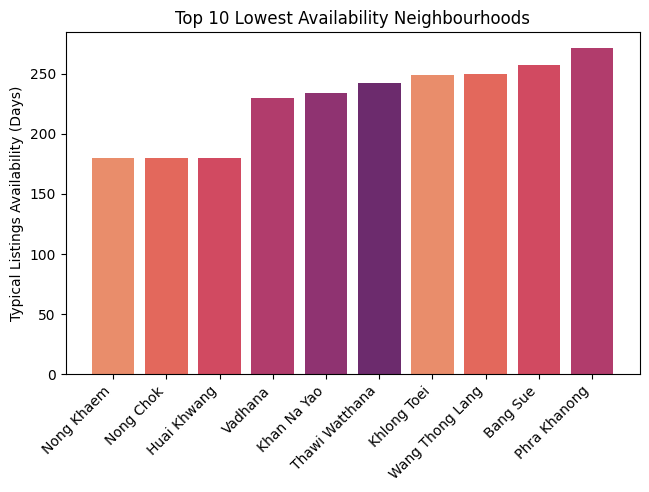

In [15]:
#Plot bar charts for lowest availability neighbourhoods
plt.bar(lowest_availability['neighbourhood'].tolist(), lowest_availability['availability_365'], color=sns.color_palette('flare'))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align to the right
plt.tight_layout()  # Adjust the padding to prevent clipping of labels
plt.title("Top 10 Lowest Availability Neighbourhoods")
plt.ylabel("Typical Listings Availability (Days)")
plt.show()


Correlation between availability rate and price: -0.06584224251851925


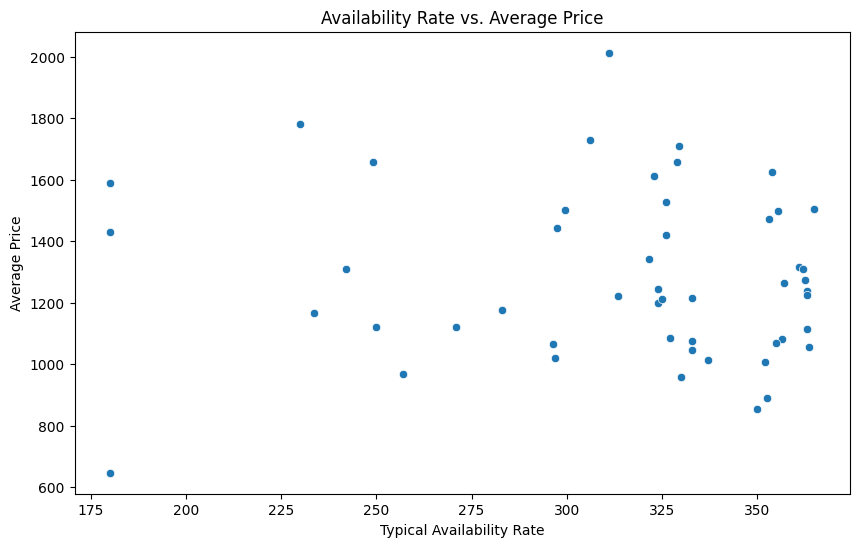

In [16]:
#Check correlation between median availability and average price
correlation = grouped_data_neighbourhood_aggregate['availability_365'].corr(grouped_data_neighbourhood_aggregate['price'])
print(f"Correlation between availability rate and price: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=grouped_data_neighbourhood_aggregate)
plt.title('Availability Rate vs. Average Price')
plt.xlabel('Typical Availability Rate')
plt.ylabel('Average Price')
plt.show()


### The resulting correlation shows that there's no signicant correlation between availability rate and price

### Hypothesis Testing

Null Hypothesis: Neigborhoods with higher and lower availability rates have the same average prices

Alternative Hypothesis: Neighborhoods with higher availability rates have significantly different average prices compared to those with lower availability rates.

Testing Method: 

- Shapiro-Wilk test for normality testing
- Levene's test for euqual variance
- T-test if distribution is normal, Mann-Whitney U test if distribution is not normal


Shapiro-Wilk Test for High Availability Group: ShapiroResult(statistic=0.9344632625579834, pvalue=0.4931975305080414)
Shapiro-Wilk Test for Low Availability Group: ShapiroResult(statistic=0.9716906547546387, pvalue=0.9060623049736023)
Levene's Test for Equal Variances: LeveneResult(statistic=7.170365636536256, pvalue=0.015359716649831646)
Mann-Whitney U Test Result: MannwhitneyuResult(statistic=44.0, pvalue=0.6775849579524755)


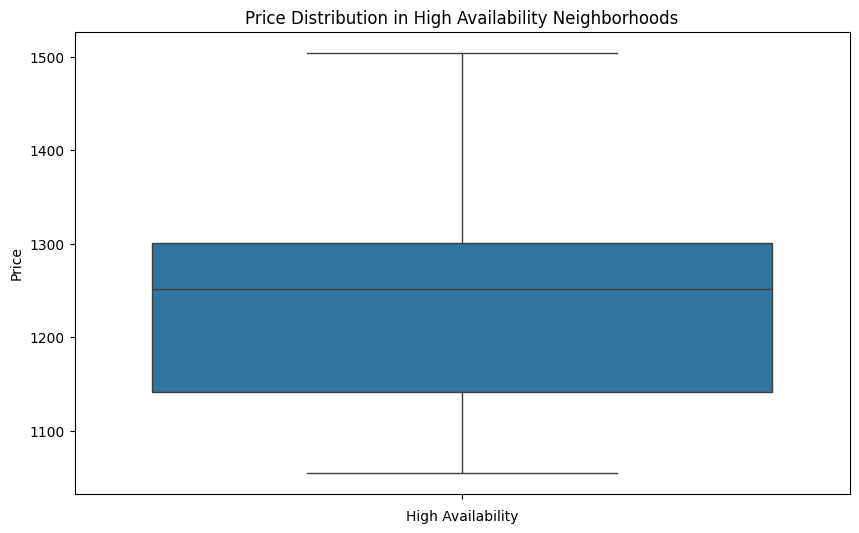

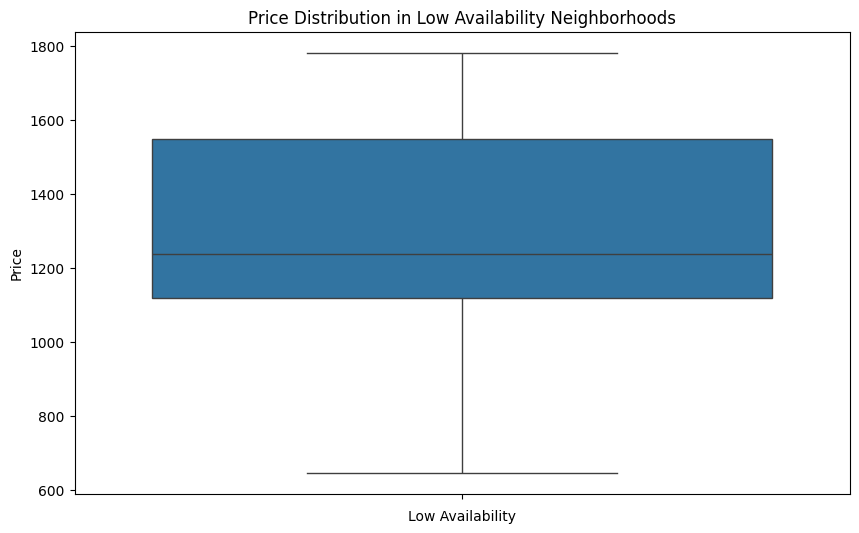

In [17]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Separate the price data into two groups
prices_high_availability = highest_availability['price']
prices_low_availability = lowest_availability['price']

# Check for normality using the Shapiro-Wilk test
shapiro_high = shapiro(prices_high_availability)
shapiro_low = shapiro(prices_low_availability)
print(f"Shapiro-Wilk Test for High Availability Group: {shapiro_high}")
print(f"Shapiro-Wilk Test for Low Availability Group: {shapiro_low}")

# Check for equal variances using Levene's test
levene_test = levene(prices_high_availability, prices_low_availability)
print(f"Levene's Test for Equal Variances: {levene_test}")

# Choose the appropriate test based on the above results
if shapiro_high.pvalue > 0.05 and shapiro_low.pvalue > 0.05 and levene_test.pvalue > 0.05:
    # Perform Independent t-test
    ttest_result = ttest_ind(prices_high_availability, prices_low_availability)
    print(f"Independent t-test Result: {ttest_result}")
else:
    # Perform Mann-Whitney U Test
    mannwhitney_result = mannwhitneyu(prices_high_availability, prices_low_availability)
    print(f"Mann-Whitney U Test Result: {mannwhitney_result}")




plt.figure(figsize=(10, 6))
sns.boxplot(prices_high_availability)
plt.title('Price Distribution in High Availability Neighborhoods')
plt.xlabel('High Availability')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(prices_low_availability)
plt.title('Price Distribution in Low Availability Neighborhoods')
plt.xlabel('Low Availability')
plt.ylabel('Price')
plt.show()



### The Mann Whitney U test result shows p-value of 0.67. This indicate that we do not have enough evidence to reject null hypothesis, which means there is no statistically significant difference in the average prices between neighborhoods with higher and lower availability rates.

## 4. Is there a trend in the types of listings that are more frequently reviewed?

                  count       mean        std  min  25%  50%   75%     max
room_type                                                                 
Entire home/apt  7708.0  22.467566  45.781887  0.0  0.0  5.0  24.0  1224.0
Hotel room        538.0  22.154275  58.912715  0.0  0.0  3.0  16.0   486.0
Private room     4957.0   9.350010  30.487503  0.0  0.0  1.0   5.0   807.0
Shared room       443.0   5.674944  16.845800  0.0  0.0  0.0   2.5   153.0


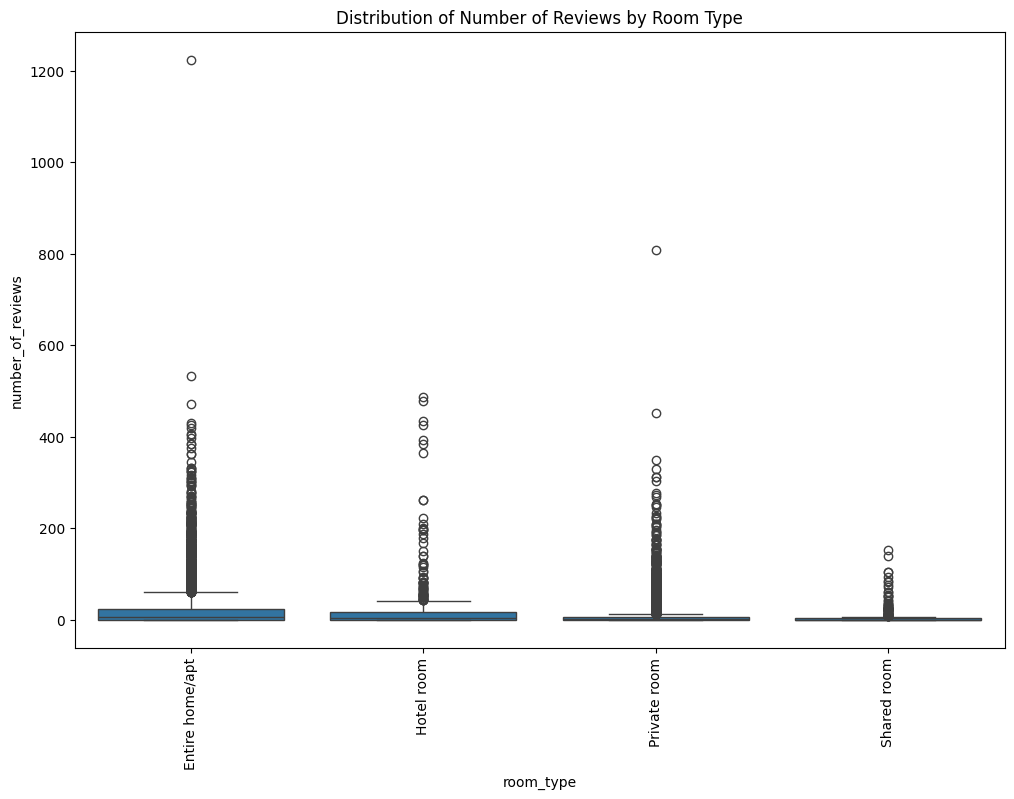

In [18]:
#Check distribution of number of reviews for each room types

# Group by neighbourhood and calculate summary statistics for number of reviews
room_type_reviews = cleaned_main_dataset_final.groupby('room_type')['number_of_reviews'].describe()

# Display summary statistics for each neighbourhood
print(room_type_reviews)

plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_main_dataset_final, x='room_type', y='number_of_reviews')
plt.xticks(rotation=90)
plt.title('Distribution of Number of Reviews by Room Type')
plt.show()




### The boxplot shows that the distribution of number of reviews by room type is not normal. Therefore, median will be used as metrics.

                       count       mean        std  min  25%  50%    75%  \
neighbourhood                                                              
Bang Bon                 5.0   0.200000   0.447214  0.0  0.0  0.0   0.00   
Bang Kapi              239.0   7.485356  24.380880  0.0  0.0  1.0   3.50   
Bang Khae               85.0   1.870588   5.483282  0.0  0.0  0.0   1.00   
Bang Khen              108.0   6.111111  35.189031  0.0  0.0  0.0   3.00   
Bang Kho laen          118.0  21.906780  36.942318  0.0  0.0  3.0  24.75   
Bang Khun thain         17.0   5.941176  19.379340  0.0  0.0  0.0   1.00   
Bang Na                398.0  13.248744  28.097365  0.0  0.0  2.0  11.75   
Bang Phlat             191.0   3.795812  11.657172  0.0  0.0  1.0   3.00   
Bang Rak               671.0  20.707899  42.478067  0.0  0.0  4.0  18.00   
Bang Sue               231.0  16.051948  29.680720  0.0  0.0  2.0  17.50   
Bangkok Noi            121.0   6.925620  16.866221  0.0  0.0  1.0   5.00   
Bangkok Yai 

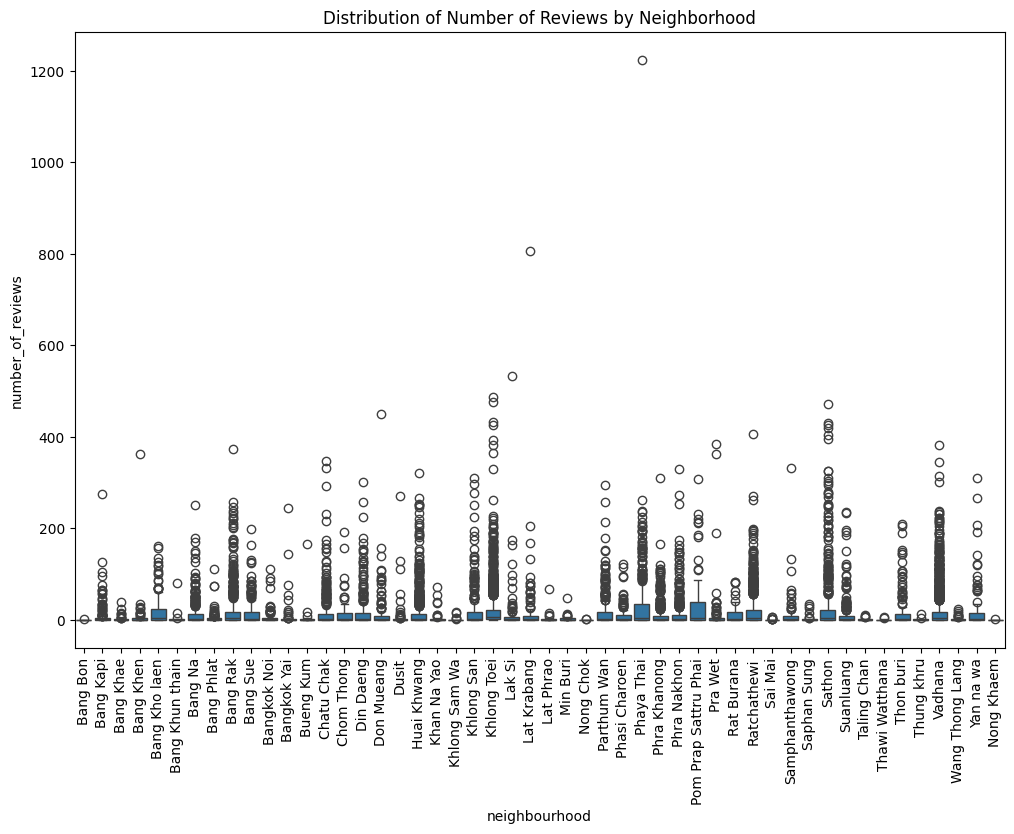

           neighbourhood       mean  median        std
0               Bang Bon   0.200000     0.0   0.447214
1              Bang Kapi   7.485356     1.0  24.380880
2              Bang Khae   1.870588     0.0   5.483282
3              Bang Khen   6.111111     0.0  35.189031
4          Bang Kho laen  21.906780     3.0  36.942318
5        Bang Khun thain   5.941176     0.0  19.379340
6                Bang Na  13.248744     2.0  28.097365
7             Bang Phlat   3.795812     1.0  11.657172
8               Bang Rak  20.707899     4.0  42.478067
9               Bang Sue  16.051948     2.0  29.680720
10           Bangkok Noi   6.925620     1.0  16.866221
11           Bangkok Yai   8.506329     0.0  33.255758
12             Bueng Kum   5.111111     0.0  24.565517
13            Chatu Chak  15.149798     1.0  37.923348
14            Chom Thong  15.712121     1.0  34.718102
15             Din Daeng  15.707500     2.0  35.711065
16            Don Mueang  15.579310     1.0  45.648212
17        

In [34]:
#Check distribution of number of reviews for each neighbourhoods

# Group by neighbourhood and calculate summary statistics for number of reviews
neighborhood_reviews = cleaned_main_dataset_final.groupby('neighbourhood')['number_of_reviews'].describe()

# Display summary statistics for each neighbourhood
print(neighborhood_reviews)

# Plot boxplot to show distribution of number of reviews per neighborhood
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_main_dataset_final, x='neighbourhood', y='number_of_reviews')
plt.xticks(rotation=90)
plt.title('Distribution of Number of Reviews by Neighborhood')
plt.show()

# Group by neighbourhood and calculate mean, median, and standard deviation of reviews
neighborhood_stats = cleaned_main_dataset_final.groupby('neighbourhood')['number_of_reviews'].agg(['mean', 'median', 'std']).reset_index()

# Display the statistics
print(neighborhood_stats)



### The boxplot shows that the distribution of number of reviews by neighbourhoods is not normal. Therefore, median will be used as metrics.

In [35]:
#Grouped reviews by neighbourhood and room type
grouped_data_roomtype_trend_median = cleaned_main_dataset_final.groupby('room_type')['number_of_reviews'].median().round(2).reset_index()
grouped_data_roomtype_trend_median = grouped_data_roomtype_trend_median.sort_values(by='number_of_reviews', ascending=False)

grouped_data_roomtype_trend_total = cleaned_main_dataset_final.groupby('room_type')['number_of_reviews'].sum().round(2).reset_index()
grouped_data_roomtype_trend_total = grouped_data_roomtype_trend_total.sort_values(by='number_of_reviews', ascending=False)


grouped_data_neighbourhood_trend = cleaned_main_dataset_final.groupby('neighbourhood')['number_of_reviews'].median().round(2).reset_index()
grouped_data_neighbourhood_trend = grouped_data_neighbourhood_trend.sort_values(by='number_of_reviews', ascending=False)
filtered_neighbourhood = grouped_data_neighbourhood_trend[grouped_data_neighbourhood_trend['number_of_reviews'] > 0].head(25)


grouped_data_neighbourhood_trend_total = cleaned_main_dataset_final.groupby('neighbourhood')['number_of_reviews'].sum().round(2).reset_index()
grouped_data_neighbourhood_trend_total = grouped_data_neighbourhood_trend_total.sort_values(by='number_of_reviews', ascending=False).head(25)





### After grouping number of reviews by room type and neigbhourhoods, we can visualize the data using matplotlib. Two different metrics will be displayed in the visualization: typical (median) number of reviews and total number of reviews by room type and neighbourhoods.

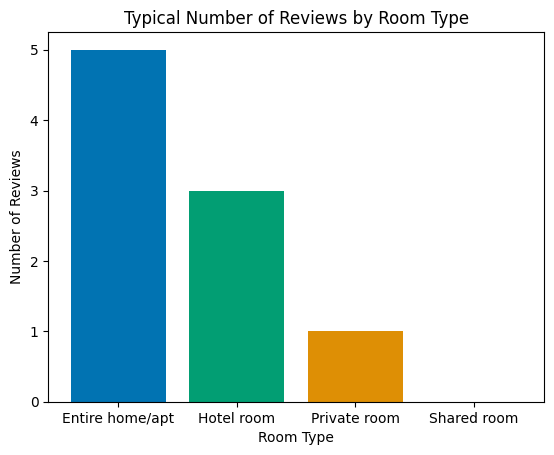

In [36]:
# Bar plot Median for reviews by room type
plt.bar(grouped_data_roomtype_trend_median['room_type'].tolist(), grouped_data_roomtype_trend_median['number_of_reviews'], color=[colorblind_palette[room_types_order.index(rt)] for rt in grouped_data_roomtype_trend_median['room_type']])
plt.title('Typical Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()


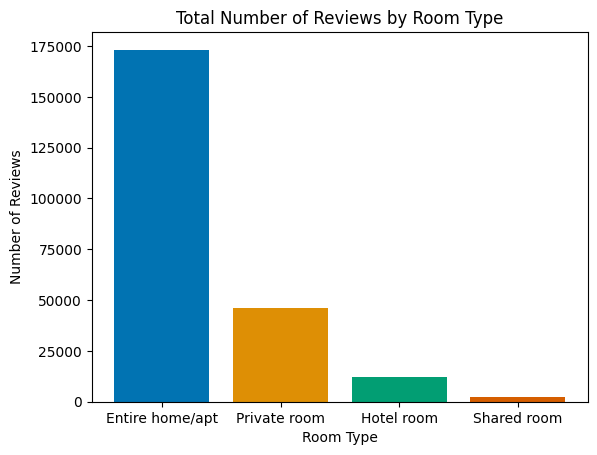

In [37]:
# Bar plot Total for reviews by room type
plt.bar(grouped_data_roomtype_trend_total['room_type'].tolist(), grouped_data_roomtype_trend_total['number_of_reviews'], color=[colorblind_palette[room_types_order.index(rt)] for rt in grouped_data_roomtype_trend_total['room_type']])
plt.title('Total Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()


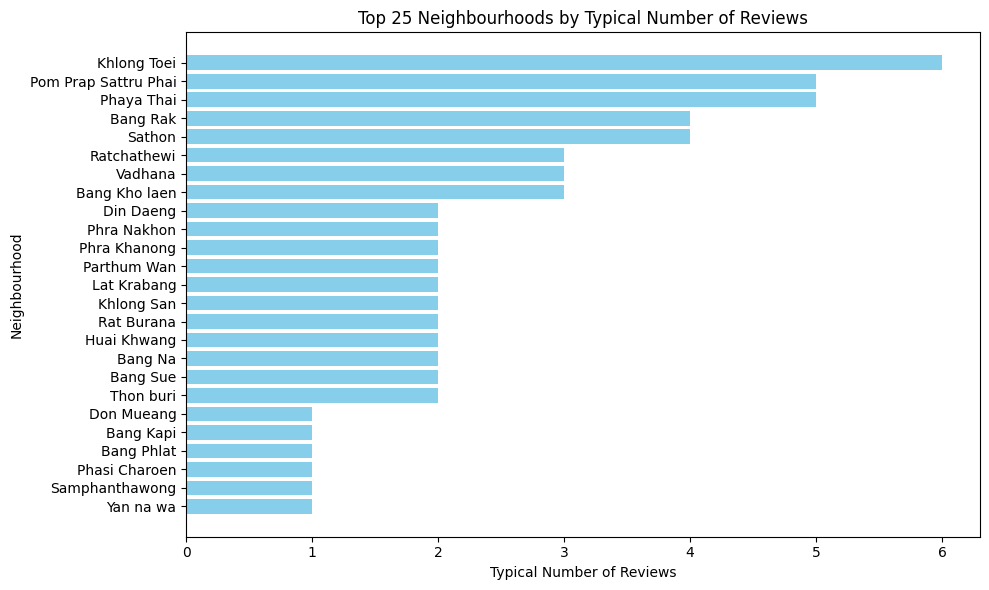

In [38]:
# Bar plot for reviews by neighbourhood
plt.figure(figsize=(10, 6))
plt.barh(filtered_neighbourhood['neighbourhood'].iloc[::-1], filtered_neighbourhood['number_of_reviews'].iloc[::-1], color='skyblue')
plt.ylabel('Neighbourhood')
plt.xlabel('Typical Number of Reviews')
plt.title('Top 25 Neighbourhoods by Typical Number of Reviews')
plt.tight_layout()
plt.show()

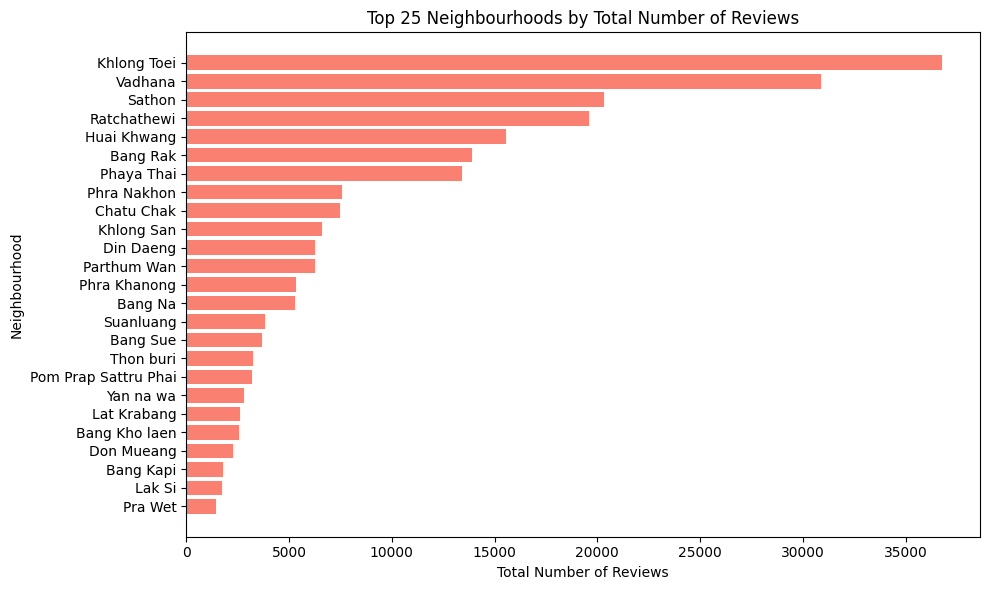

In [39]:
# Bar plot for total number of reviews by neighbourhood
plt.figure(figsize=(10, 6))
plt.barh(grouped_data_neighbourhood_trend_total['neighbourhood'].iloc[::-1], grouped_data_neighbourhood_trend_total['number_of_reviews'].iloc[::-1], color='salmon')
plt.ylabel('Neighbourhood')
plt.xlabel('Total Number of Reviews')
plt.title('Top 25 Neighbourhoods by Total Number of Reviews')
plt.tight_layout()
plt.show()

### Hypothesis Testing

Null Hypothesis: Room type does not influence how frequently it is reviewed

Alternative Hypothesis: Certain room types are reviewed more frequently than others.

Testing Method: 
- Chi squared test

In [40]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(cleaned_main_dataset_final['room_type'], cleaned_main_dataset_final['number_of_reviews'])

chi_square_result = chi2_contingency(contingency_table)

chi_square_result


Chi2ContingencyResult(statistic=1913.563797959478, pvalue=2.6602901704232954e-82, dof=858, expected_freq=array([[2.68192760e+03, 8.42762421e+02, 4.67699253e+02, ...,
        5.64854170e-01, 5.64854170e-01, 5.64854170e-01],
       [1.87192144e+02, 5.88228052e+01, 3.26442914e+01, ...,
        3.94254727e-02, 3.94254727e-02, 3.94254727e-02],
       [1.72474249e+03, 5.41978895e+02, 3.00776491e+02, ...,
        3.63256632e-01, 3.63256632e-01, 3.63256632e-01],
       [1.54137769e+02, 4.84358786e+01, 2.68799648e+01, ...,
        3.24637256e-02, 3.24637256e-02, 3.24637256e-02]]))

### The result  of the chi squared test shows that p-value is far below the significance level, which means we reject the null hypothesis. This means there is evidence to support that certain room types are reviewed more frequently than others

## 5. For listings with a high number of reviews, what is the average minimum nights, and how does it correlate with price?

<Axes: ylabel='minimum_nights'>

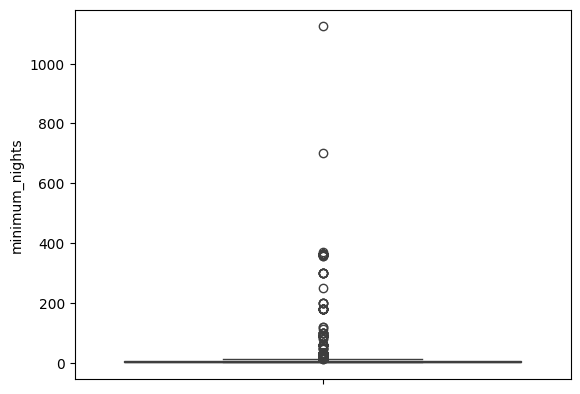

In [41]:
#Set the threshold for listings with number of reviews with 75th quantile
threshold = cleaned_main_dataset_final['number_of_reviews'].quantile(0.75)


# Filter listings with high number of reviews
high_review_listings = cleaned_main_dataset_final[cleaned_main_dataset_final['number_of_reviews'] > threshold]
high_review_listings = high_review_listings.sort_values(by='number_of_reviews', ascending=False)
high_review_listings_min = high_review_listings['number_of_reviews'].min()
high_review_listings_max = high_review_listings['number_of_reviews'].max()

high_review_listings_filtered = high_review_listings[high_review_listings['minimum_nights'] < 100]
high_review_listings_filtered = high_review_listings_filtered.sort_values(by='number_of_reviews', ascending=False)

low_review_listings = cleaned_main_dataset_final[cleaned_main_dataset_final['number_of_reviews'] < threshold]
low_review_listings = low_review_listings.sort_values(by='number_of_reviews', ascending=False)
low_review_listings_min = low_review_listings['number_of_reviews'].min()
low_review_listings_max = low_review_listings['number_of_reviews'].max()
 
#Check the distribution of minimum nights using boxplot 
sns.boxplot(high_review_listings['minimum_nights'])





### The boxtplot shows that the distribution of minimun nights is not normal. Therefore, median will be used as a metric.

### Hypothesis Testing

Null Hypothesis: Both high and low reviewed listings will have the same minimum nights

Alternative Hypothesis: Highly reviewed listings will have lower minimum nights compare to lower reviewed listings

Testing Method: 
- Shapiro-Wilk for normality test
- Mann-Whitney U to check the final p-value

/Users/irfan/.pyenv/versions/3.8.2/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/var/folders/vz/wpgxbsr16tl99gtpfprn16lc0000gn/T/ipykernel_1216/696903140.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_group', y='minimum_nights', data=combined_reviews, palette="Set2")


Shapiro-Wilk Test for High Reviewed Listigns: ShapiroResult(statistic=0.23120170831680298, pvalue=0.0)
Shapiro-Wilk Test for Low Reviewed Listigns: ShapiroResult(statistic=0.31787657737731934, pvalue=0.0)
Mann-Whitney U test statistic: 17114566.5, p-value: 0.8395213665645009


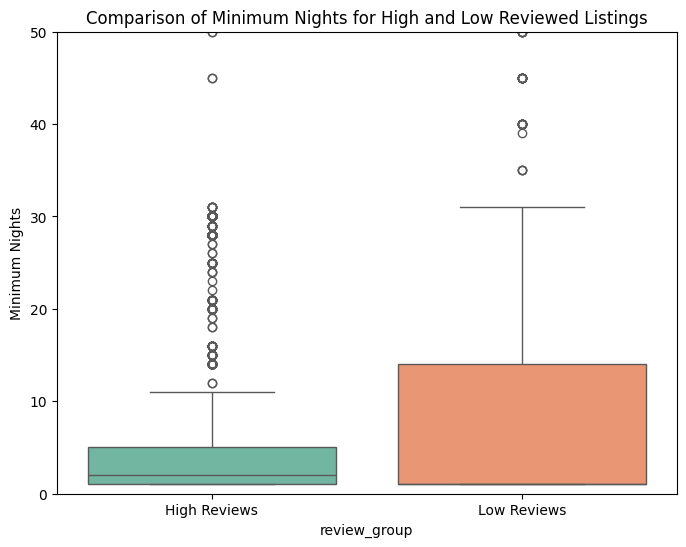

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, mannwhitneyu

shapiro_minimum_high = shapiro(high_review_listings['minimum_nights'])
shapiro_minimum_low = shapiro(low_review_listings['minimum_nights'])

print(f"Shapiro-Wilk Test for High Reviewed Listigns: {shapiro_minimum_high}")
print(f"Shapiro-Wilk Test for Low Reviewed Listigns: {shapiro_minimum_low}")


stat, p_value = mannwhitneyu(high_review_listings['minimum_nights'], low_review_listings['minimum_nights'])
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p_value}")



# Create a label for high and low review groups
high_review_listings['review_group'] = 'High Reviews'
low_review_listings['review_group'] = 'Low Reviews'

# Combine both groups into a single DataFrame
combined_reviews = pd.concat([high_review_listings[['minimum_nights', 'review_group']],
                              low_review_listings[['minimum_nights', 'review_group']]])

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='review_group', y='minimum_nights', data=combined_reviews, palette="Set2")

plt.title('Comparison of Minimum Nights for High and Low Reviewed Listings')
plt.ylabel('Minimum Nights')


plt.ylim(0, 50) 
plt.show()






### The Mann-Whitney U test shows the P-value result is above 0.05, this means we don't have enough evidence to reject the null hypothesis

### To visualize the distribution of minimum nights for listings with high and low number of reviews, a histogram will be used.

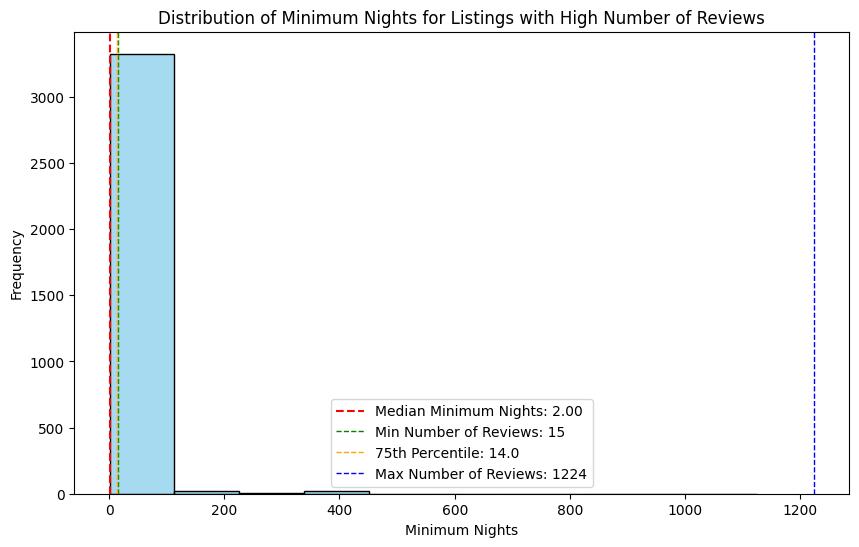

2.0


In [43]:
#Visualize the listings with high number of reviews


#Plot a histogram for minimum nights
plt.figure(figsize=(10, 6))
sns.histplot(high_review_listings['minimum_nights'], bins=10, kde=False, color='skyblue')

#Calculate the average minimum nights
median_minimum_nights = high_review_listings['minimum_nights'].median()

#Add a vertical line for the average minimum nights
plt.axvline(median_minimum_nights, color='red', linestyle='--', label=f'Median Minimum Nights: {median_minimum_nights:.2f}')
plt.axvline(high_review_listings_min, color='green', linestyle='--', linewidth=1, label=f"Min Number of Reviews: {high_review_listings_min}")
plt.axvline(threshold, color='orange', linestyle='--', linewidth=1, label=f"75th Percentile: {threshold}")
plt.axvline(high_review_listings_max, color='blue', linestyle='--', linewidth=1, label=f"Max Number of Reviews: {high_review_listings_max}")

# Customize the plot
plt.title('Distribution of Minimum Nights for Listings with High Number of Reviews')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### A refined histogram showing the distribution of minimum nights for listings with a high number of reviews, using a narrower bin range, was created to provide a more detailed view of the distribution.

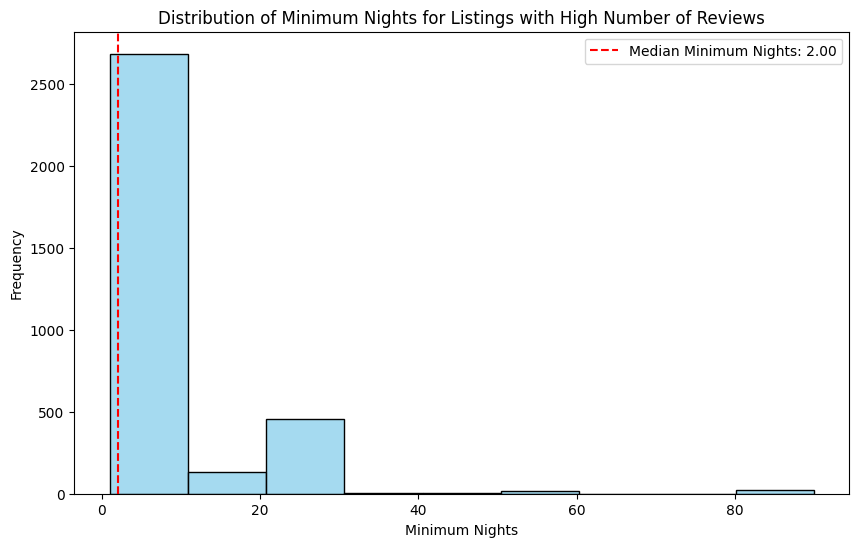

In [50]:
#Plot a histogram for minimum nights
plt.figure(figsize=(10, 6))
sns.histplot(high_review_listings_filtered['minimum_nights'], binwidth=10, kde=False, color='skyblue')

#Calculate the average minimum nights
median_minimum_nights = high_review_listings_filtered['minimum_nights'].median()

#Add a vertical line for the average minimum nights
plt.axvline(median_minimum_nights, color='red', linestyle='--', label=f'Median Minimum Nights: {median_minimum_nights:.2f}')

# Customize the plot
plt.title('Distribution of Minimum Nights for Listings with High Number of Reviews')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.legend()
plt.show()


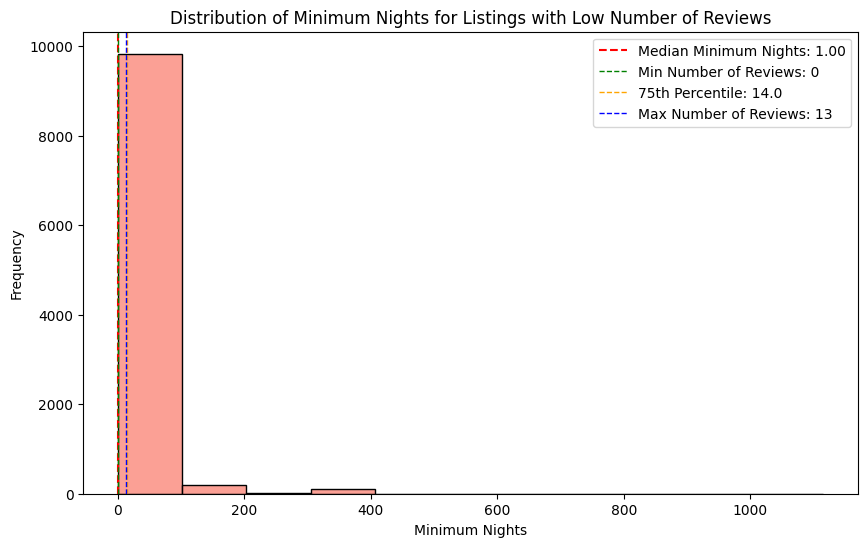

In [45]:
#Plot a histogram for minimum nights
plt.figure(figsize=(10, 6))
sns.histplot(low_review_listings['minimum_nights'], binwidth=100, kde=False, color='salmon')

#Calculate the average minimum nights
median_minimum_nights_low = low_review_listings['minimum_nights'].median()

#Add a vertical line for the average minimum nights
plt.axvline(median_minimum_nights_low, color='red', linestyle='--', label=f'Median Minimum Nights: {median_minimum_nights_low:.2f}')
plt.axvline(low_review_listings_min, color='green', linestyle='--', linewidth=1, label=f"Min Number of Reviews: {low_review_listings_min}")
plt.axvline(threshold, color='orange', linestyle='--', linewidth=1, label=f"75th Percentile: {threshold}")
plt.axvline(low_review_listings_max, color='blue', linestyle='--', linewidth=1, label=f"Max Number of Reviews: {low_review_listings_max}")

# Customize the plot
plt.title('Distribution of Minimum Nights for Listings with Low Number of Reviews')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### A scatterplot is used to check the correlation between minimum nights and prices.

Median Minimum Nights for High Review Listings: 2.0
Correlation between Minimum Nights and Price: -0.03873686401382395


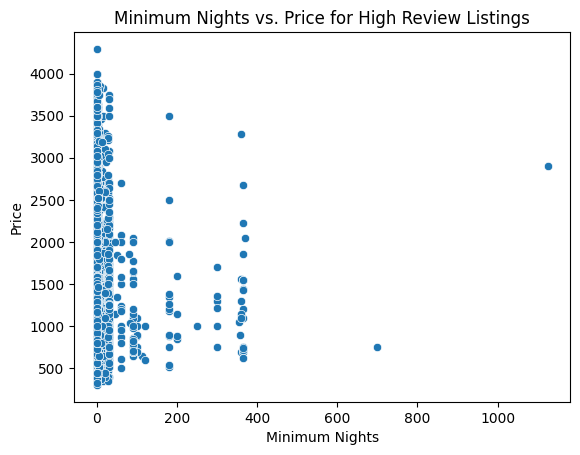

,price,minimum_nights
price,1.000000,-0.026314
minimum_nights,-0.026314,1.000000


In [46]:
#High review listings
# Calculate median minimum nights
median_minimum_nights = high_review_listings['minimum_nights'].median()

print(f"Median Minimum Nights for High Review Listings: {median_minimum_nights}")

# Calculate correlation between minimum nights and price
correlation = high_review_listings['minimum_nights'].corr(high_review_listings['price'])

print(f"Correlation between Minimum Nights and Price: {correlation}")

# Visualize the relationship between minimum nights and price
sns.scatterplot(x='minimum_nights', y='price', data=high_review_listings)
plt.title('Minimum Nights vs. Price for High Review Listings')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

high_review_listings[['price','minimum_nights']].corr('spearman')

Median Minimum Nights for High Review Listings: 1.0
Correlation between Minimum Nights and Price: -0.06676031137587565


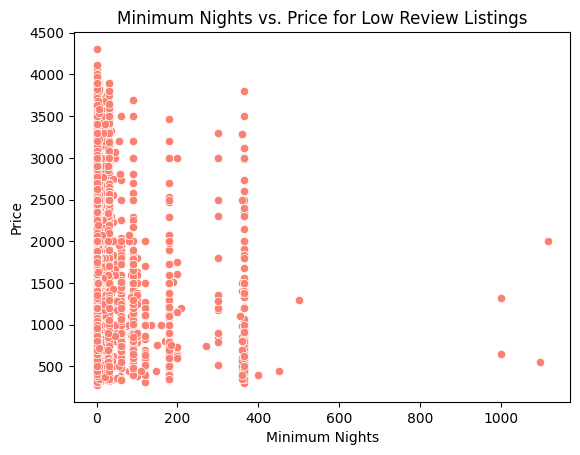

,price,minimum_nights
price,1.000000,-0.050925
minimum_nights,-0.050925,1.000000


In [47]:
#Low review listings
# Calculate median minimum nights
median_minimum_nights = low_review_listings['minimum_nights'].median()

print(f"Median Minimum Nights for High Review Listings: {median_minimum_nights}")

# Calculate correlation between minimum nights and price
correlation = low_review_listings['minimum_nights'].corr(low_review_listings['price'])

print(f"Correlation between Minimum Nights and Price: {correlation}")

# Visualize the relationship between minimum nights and price
sns.scatterplot(x='minimum_nights', y='price', color='salmon', data=low_review_listings)
plt.title('Minimum Nights vs. Price for Low Review Listings')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

low_review_listings[['price','minimum_nights']].corr('spearman')

### The scatterplot shows that there is no significant correlation between minimum nights and prices for both high and low reviews listings.